In [4]:
import tweepy
 
# Add Twitter API key and secret
consumerKey = "7WRzB3IWiSVmJ7Q5uG0lPEPE0"
consumerSecret = "lPCyQvfWFtq6Z5Ek89ohQCb7nFrbbl76RBHw1mSdIUu2HCHO0U"
 
# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumerKey, consumerSecret)
 
# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print('Reached rate limite. Sleeping for >15 minutes')
            time.sleep(15 * 61)
        except StopIteration:
            break

In [6]:
# Define the term you will be using for searching tweets
query = '#TheBachelorette'
query = query + ' -filter:retweets - filter:replies'

In [7]:

# Define how many tweets to get from the Twitter API
count = 1000
 
# Search for tweets using Tweepy
search = limit_handled(tweepy.Cursor(api.search,
                       q=query,
                       tweet_mode='extended',
                       lang='en',
                       result_type="recent").items(count))
 
# Process the results from the search using Tweepy
tweets = []
for result in search:
    tweet_content = result.full_text
    tweets.append(tweet_content) # Only saving the tweet content.

AttributeError: 'API' object has no attribute 'search'

In [35]:
import pandas as pd

#import the csv twwets.csv
result =  pd.read_csv('tweets_07_07.csv')

In [36]:

# Process the results from the search using Tweepy
tweets = []
for i in range(len(result)):
    tweet_content = result.text[i]
    tweets.append(tweet_content) # Only saving the tweet content.

In [23]:
from transformers import pipeline
specific_model = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")


Downloading:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
specific_model.save_pretrained("./twitter_roberta")
pipeline.from_pretrained("./your_file_name")


In [28]:
tweets_df

,0
0,Andi Dorfman has thoughts about there being tw...
1,"Ladies and gentlemen, we finally know which me..."
2,#TheBachelorette Season 19 is less than a mont...
3,Did Michelle and Nayte really break up?! #theb...
4,Just saw a promo for #TheBachelorette &amp; it...
...,...
95,Share the #Best #tvshow content\r\nDownload th...
96,Share the #Best #tvshow content\r\nDownload th...
97,What's #Best on https://t.co/N2a7jotnp4 ?\r\nT...
98,Download the Best #app to share your #Best #tv...


In [37]:
tweets_df = pd.DataFrame({'Tweets': tweets})
tweets_df['sentiment'] = tweets_df['Tweets'].apply(lambda x: specific_model(x)[0]['label'])

In [38]:
import plotly.express as px
fig = px.histogram(tweets_df, x="sentiment", nbins=3)
fig.show()

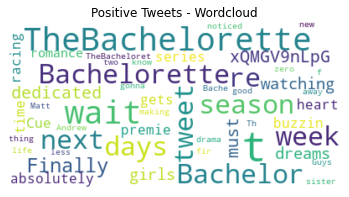

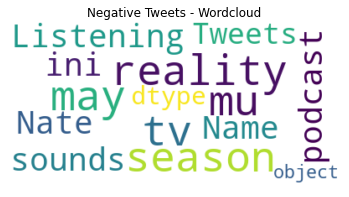

In [39]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
# Wordcloud with positive tweets
positive_tweets = tweets_df['Tweets'][tweets_df["sentiment"] == 'Positive']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = tweets_df['Tweets'][tweets_df["sentiment"] == 'Negative']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()